<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#군집분석-과제" data-toc-modified-id="군집분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>군집분석 과제</a></span></li></ul></div>

# 군집분석 과제 

In [39]:
import pandas as pd

위의 데이터에서 Murder	Assault	UrbanPop	Rape를 가지고 아래와 같이  K-means 군집분석을 진행하세요 
- 1) 최적의 k 값 찾으세요. 
- 2) 콜린스키하라바츠스코어 구하세요. 
- 3) SSE구하세요 
- 4) 군집분석한 결과를 해석하세요 

In [40]:
# 비계층적 군집분석 : n개의 개체를 k개의 군집으로 클러스터링 할 때, 가능한 모든 군집으로 분류 검토 후 최적의 군집을 형성
# K-means 군집분석 : 클러스터와 개체간 거리차이의 분산이 최소가 되도록 군집을 형성.
# 원형데이터 적합, 변수가 적은 데이터 적합, 이상치 민감
# 콜린스크하라바츠/앨보우을 통해 K값 추출 
# k-means 군집분석 : 클러스터 수와 seed 설정 > 개체를 각 클러스터에 할당 > seed 재설정
# seed의 변화가 최소가 되거나, 모든 개체가 클러스터에 배당 될 때 중지

In [50]:
# 데이터 전처리
df = pd.read_csv("data/USArrests.csv")
df
X = df.drop('Unnamed: 0', axis = 1)
X

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [51]:
# 2) 콜린스키하라바츠스코어 구하세요. 
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state = 1).fit(X)
    labels = kmeans_model.labels_
    print(k, " : "  ,calinski_harabasz_score(X,labels))


2  :  129.16750641095095
3  :  150.82736111645258
4  :  141.76241251642008
5  :  152.68636141181392
6  :  158.03230599203238
7  :  156.2208581572518
8  :  154.16122402657848
9  :  158.78597024253023


In [52]:
# 3) SSE구하세요 (엘보우기법)
import matplotlib.pyplot as plt

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i, random_state = 1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The number of clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

C:\Users\KDB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


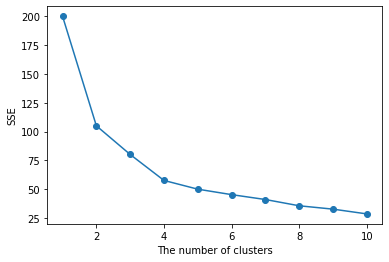

[200.0, 104.96163315756871, 80.08569526137276, 57.55425863091104, 49.96920284452793, 45.236049045772866, 40.99965950480165, 35.570970075454255, 32.65195608327404, 28.518626026978588]


In [45]:
elbow(X)

In [54]:
# 3 -> 4 갈 때 기울기 소실
# 1) 최적의 k 값 찾으세요.  -> 3

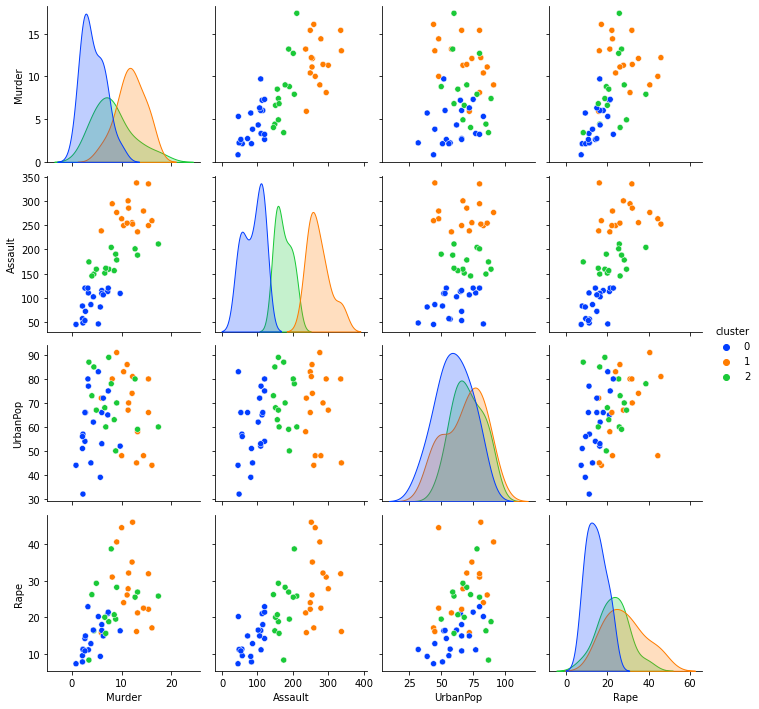

In [57]:
# 4) 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X,
             diag_kind = 'kde',
             hue = 'cluster',
             palette = 'bright')
plt.show()

###### pairplot
###### 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현
###### ex)) 1행(Murder), 2열(Assault) : 강도 발생률이 높을 수록, 살인률이 높다.

In [58]:
# 5) 군집분석한 결과를 해석하세요 
km = KMeans(n_clusters = 3, random_state = 1).fit(X)
new_labels = km.labels_
X['cluster'] = new_labels
X.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857


##### 미국 50개주의 살인, 강도, 강간, 인구변수에 대한 3개의 군집분석을 수행한 결과,
##### 군집 0은 도시인구가 적고, 모든 범죄 발생율이 비교적 낮은 주로 이루어져 있다.
##### 군집 1은 모든 범죄 발생율이 가장 높은 주로 이루어져 있으며,
##### 군집 2는 도시인구가 가장 많으며, 모든 범죄 발생율이 중간을 이루고 있다. 